In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df=pd.read_csv("speed_distance.csv")
df

,Time_Seconds,Distance_Meters
0,0.00000,2.993428
1,0.02004,1.783391
2,0.04008,3.414814
3,0.06012,5.224613
4,0.08016,1.768961
...,...,...
495,9.91984,-16.364271
496,9.93988,-19.655458
497,9.95992,-18.100919
498,9.97996,-19.611157


In [3]:
x=df[["Time_Seconds"]]
y=df["Distance_Meters"]

In [4]:
poly_feature=PolynomialFeatures(degree=2)
x_feature=poly_feature.fit_transform(x)
x_feature

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00400802e-02, 4.01604813e-04],
       [1.00000000e+00, 4.00801603e-02, 1.60641925e-03],
       ...,
       [1.00000000e+00, 9.95991984e+00, 9.92000032e+01],
       [1.00000000e+00, 9.97995992e+00, 9.95996000e+01],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02]], shape=(500, 3))

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x_feature,y,test_size=0.2,random_state=42)

In [6]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_pred=model.predict(x_test)
y_pred

array([ -2.36129696,   5.17166955,  -3.5216133 ,   6.56795562,
         6.03096061,  -5.44507192,  -3.79944091,   6.37151819,
         4.99534062, -11.72294614,   2.12309203,   6.2427936 ,
        -6.67964545,   5.52269813,  -3.24755906,  -4.85042532,
       -17.72043997,   3.31270344,   1.10804546,  -6.89127737,
       -17.01212554, -17.1529499 ,   3.27223502,  -1.93388824,
         5.27243577, -13.11059814, -18.00670058,   5.90148747,
         5.96541243,  -0.17781078, -14.95007159,  -0.32906894,
       -10.50546685,   6.49712141,   1.68546719,  -0.10281059,
        -6.99772223,   5.06712998,   5.94793007,   4.80853012,
        -4.4623795 ,   5.77216973, -16.31429267,   6.3744314 ,
         3.46755449,   5.30518598,   1.55665816,   2.24435434,
        -7.64519587,   2.88131978,   5.13724229,   6.41076394,
         6.45109306,  -7.10458635,   6.25909707,   4.4878317 ,
         6.55881681,   2.65556565,   6.05669947,   5.33751693,
       -17.57793856,   4.15056834,   0.62413185, -16.03

In [8]:
msc=mean_squared_error(y_pred,y_test)
print(f"mean_squared_error:{msc}")
rmsc=np.sqrt(msc)
print(f"root_mean_squared_error:{rmsc}")
score=r2_score(y_pred,y_test)
print(f"score:{score}")



mean_squared_error:3.8540026949429556
root_mean_squared_error:1.9631614031818565
score:0.9307674503371388


In [9]:
m=model.predict(poly_feature.transform(x))

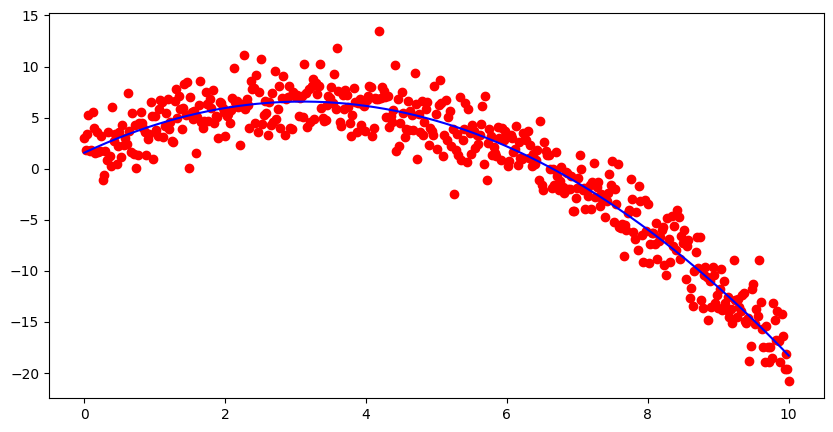

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(x,y,c="r")
plt.plot(x,m,c="b")
plt.show()

In [11]:
new_data=np.array([[9.97978]])
poly=poly_feature.transform(new_data)
predict=model.predict(poly)
predict

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([-18.14916724])

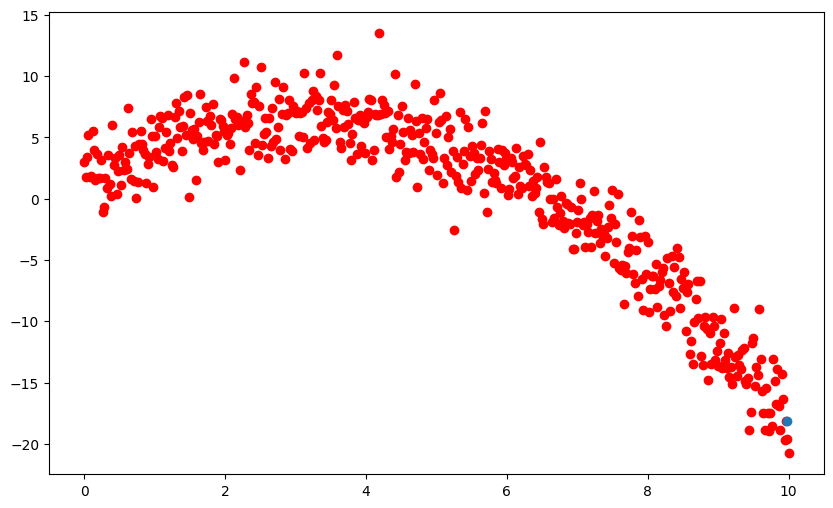

In [12]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.scatter(new_data,predict)
plt.show()